In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os 
import json 




scifact_path = "../inference/measured_data/sub_runs/scifact/"
panosco_path = "../inference/measured_data/sub_runs/panosc/"

colbert_scifact = os.path.join(scifact_path, "ColBERTv2")
colbert_panosco = os.path.join(panosco_path, "ColBERTv2")

bm25_scifact = os.path.join(scifact_path, "Lucene bm25")
bm25_panosco = os.path.join(panosco_path, "Lucene bm25")


def load_json(path):
    with open(path, "r") as f:
        return json.load(f)



In [10]:
def aggregate_runs(model_path: str) -> dict:
    """
    Aggregate all runs for a specific model and dataset.
    Returns a dictionary with lists of scores for each @k value.
    """
    results = {
        "NDCG": {"1":[], "10": [], "100": [], "1000": []},
        "Recall": {"1": [], "10": [], "100": [], "1000": []}
    }
    
    # Load each run file
    for file in os.listdir(model_path):
        if not file.endswith('.json'):
            continue
            
        file_path = os.path.join(model_path, file)
        with open(file_path, 'r') as f:
            run_data = json.load(f)
            
            # Add scores to appropriate lists
            for metric in ["NDCG", "Recall"]:
                for k in ["1","10", "100", "1000"]:
                    key = f"{metric}@{k}"
                    if key in run_data:
                        results[metric][k].append(run_data[key])
    
    return results

In [11]:
scifact_path = "../inference/measured_data/sub_runs/scifact/"
panosco_path = "../inference/measured_data/sub_runs/panosc/"

results = {
    "colbert": {
        "scifact": aggregate_runs(os.path.join(scifact_path, "ColBERTv2")),
        "panosc": aggregate_runs(os.path.join(panosco_path, "ColBERTv2"))
    },
    "bm25": {
        "scifact": aggregate_runs(os.path.join(scifact_path, "Lucene bm25")),
        "panosc": aggregate_runs(os.path.join(panosco_path, "Lucene bm25"))
    }
}


In [19]:
colbert_scifact = results["colbert"]["scifact"]
colbert_panosc = results["colbert"]["panosc"]

bm25_scifact = results["bm25"]["scifact"]
bm25_panosc = results["bm25"]["panosc"]



# Variance of Colbert sci fact 


In [28]:

import numpy as np
from scipy.stats import ttest_ind


colbert_scifact_scores = colbert_scifact['NDCG']["10"]
bm25_scifact_scores = bm25_scifact['NDCG']["10"]    

t_stat, p_value = ttest_ind(colbert_scifact_scores, bm25_scifact_scores, equal_var=False)  # Welch's test

# Output results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# One-tailed test
alpha = 0.05
if p_value / 2 < alpha and t_stat < 0:  # One-tailed test, direction matters
    print("Reject the null hypothesis: BM25 is not significantly better than ColBERT.")
else:
    print("Fail to reject the null hypothesis: Insufficient evidence to suggest BM25 is not better.")





T-Statistic: -2.7502983900227993
P-Value: 0.013192052103329292
Reject the null hypothesis: BM25 is not significantly better than ColBERT.


In [32]:
from scipy.stats import ttest_ind

# Sample data: ColBERT and BM25 scores
colbert_scores = colbert_panosc['NDCG']["10"]
bm25_scores = bm25_panosc['NDCG']["10"]

# Perform Welch's t-test
t_stat, p_value = ttest_ind(colbert_scores, bm25_scores, equal_var=False)

# One-tailed test for H_a: u1 - u2 > 0
alpha = 0.05
if p_value / 2 < alpha and t_stat > 0:  # Divide p-value by 2 for one-tailed
    print("Reject the null hypothesis: u1 > u2.")
else:
    print("Fail to reject the null hypothesis.")


Fail to reject the null hypothesis.


In [30]:
colbert_scores

[0.78432,
 0.8326,
 0.79623,
 0.85091,
 0.84737,
 0.79968,
 0.83488,
 0.82808,
 0.8536,
 0.81509]

In [31]:
bm25_scores

[0.78364,
 0.82693,
 0.78603,
 0.83526,
 0.82978,
 0.79752,
 0.82631,
 0.83049,
 0.84448,
 0.82104]

In [5]:
from plotting import  test_plot,test_plotly, test_plot_altair


datasets = [
    [colbert_scifact, bm25_scifact],   
    [colbert_panosc, bm25_panosc]       
]
model_names = ["ColBERT", "BM25"]
dataset_names = ["SciFact", "PanOSC"]



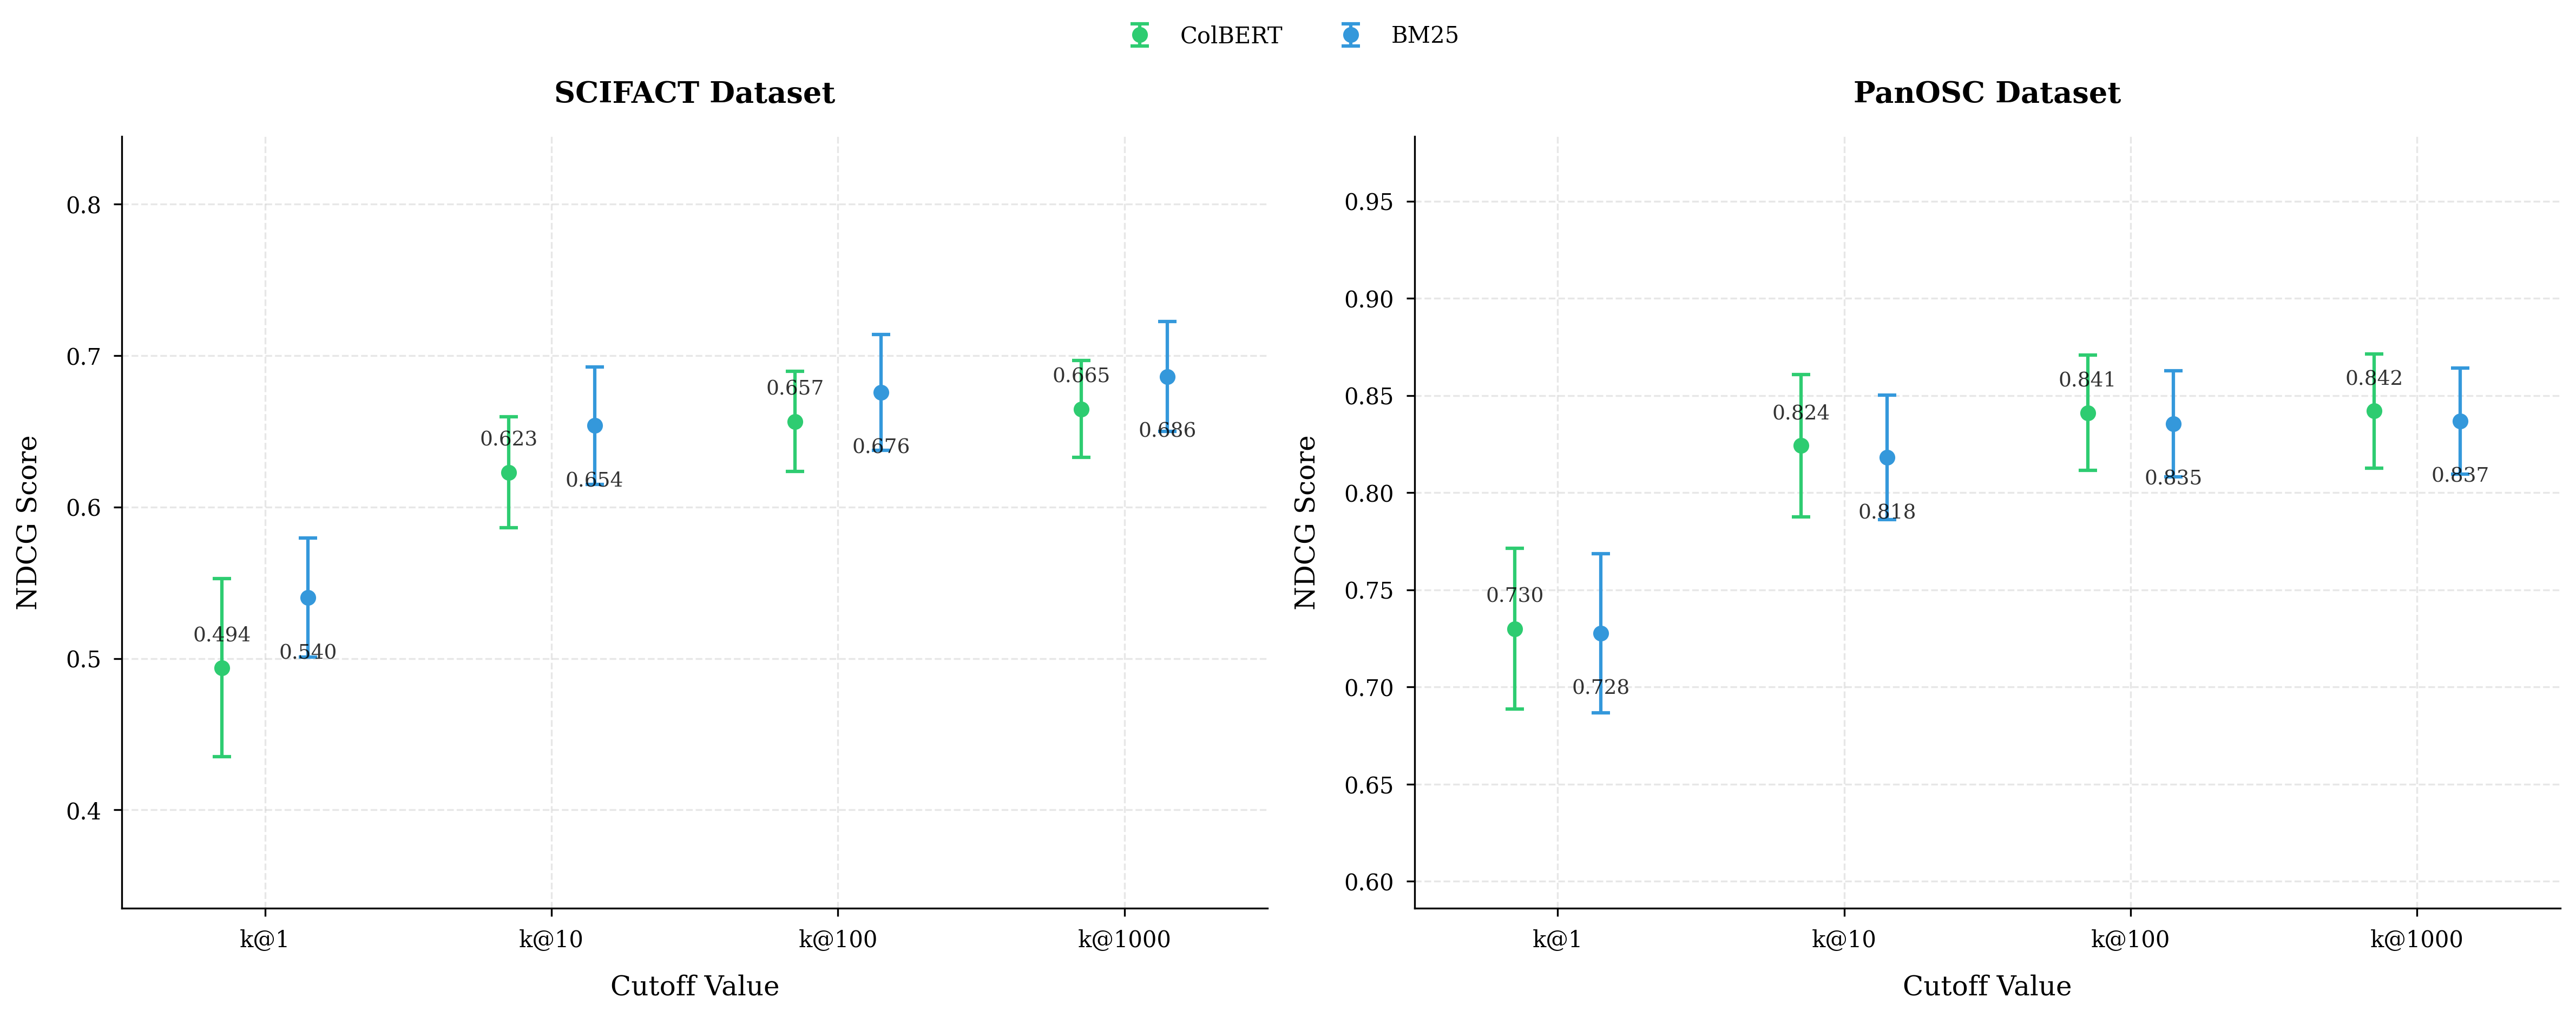

In [6]:

fig = test_plot(
    colbert_scifact, bm25_scifact,
    colbert_panosc, bm25_panosc,
    "ColBERT", "BM25",
    "SCIFACT Dataset", "PanOSC Dataset"
)

plt.show()

In [7]:
fig = test_plotly(colbert_scifact, "ColBERT")
fig.show()


In [8]:
fig = test_plot_altair(colbert_scifact, "ColBERT")
fig.show()


alt.LayerChart(...)